# Standard Risk and Performance Measures
A portfolio's performance is typically assessed using its return over time. Key measures derived from this include:
Return  = Profit
Volatile = variation , opp/ned 
Avg returns not a good way to understand how assets behave. Does not capture enough 

$$
R_{t,t+1} = (P_{t+1} - P_t )/ P_t 
$$
Retuns 
0.2 / 20% , 1.2 120% 

Utbytte: Burde altid legges inn, called Med dividend = "total return". Price return = uten dividend. 


## Multi period returns: 
$$
R_{R,t+2} = (1 + R_{t,t+1})(1+R_{t+1,t+2}) -1 
$$
* Compound over 2 periods 

$$
(1+0.10)(1-0.03)-1 = 0.067 = 6.70%
$$
* Askje gir 10% profit dag 1 , 3% profit dag 2. 

$$
(1+0.1)(1-0.1)-1 = -0.01 , -1%
$$
* Mandag:     Inngang close price mandag <null> 
*  Tirsdag:    Askje stiger 10% ifht close mandag <opp>
*  Onsdag:     Prias synker 10 %  ifht close tirsdag <ned>

In [57]:
import numpy as np
import pandas as pd

prices_a = [8.7, 9.1, 8.5, 9.0]
8.7/9.1 -1

prices_a[1:]
prices_a[:-1]

priser = pd.DataFrame({
                        "Blue": [8.7, 9.1, 8.5, 9.0,12.1],

                        "Red":[7.5, 7.9, 8.0, 8.3, 5.3]
                    })
priser

,Blue,Red
0,8.7,7.5
1,9.1,7.9
2,8.5,8.0
3,9.0,8.3
4,12.1,5.3


In [58]:
print(priser.iloc[1:])
print(priser.iloc[:-1])
priser.shift(1)

   Blue  Red
1   9.1  7.9
2   8.5  8.0
3   9.0  8.3
4  12.1  5.3
   Blue  Red
0   8.7  7.5
1   9.1  7.9
2   8.5  8.0
3   9.0  8.3


,Blue,Red
0,NaN,NaN
1,8.7,7.5
2,9.1,7.9
3,8.5,8.0
4,9.0,8.3


In [59]:
print(priser/priser.shift(1)-1)
#ingen priser for dag 1 , n priser = n-1 returns.
priser.pct_change()


       Blue       Red
0       NaN       NaN
1  0.045977  0.053333
2 -0.065934  0.012658
3  0.058824  0.037500
4  0.344444 -0.361446


,Blue,Red
0,NaN,NaN
1,0.045977,0.053333
2,-0.065934,0.012658
3,0.058824,0.037500
4,0.344444,-0.361446


        Blue       Red
0        NaN       NaN
1   2.557812  4.909909
2   5.071823  1.069258
3   0.871071  0.100569
4   0.162105  5.781454
5   5.945028  1.205881
6   1.064763  0.686944
7   0.148114  1.786258
8   1.845070  0.683464
9   3.636687  0.359669
10  0.958900  4.003288
11  0.933328  1.255413
12  0.525554  1.075124
13  0.328079  0.119163
14  2.946755  0.884386
15  1.937772  6.551387
16  0.563786  0.776442
17  1.083661  0.646227
18  0.256230  1.657074
19  0.214748  1.549347


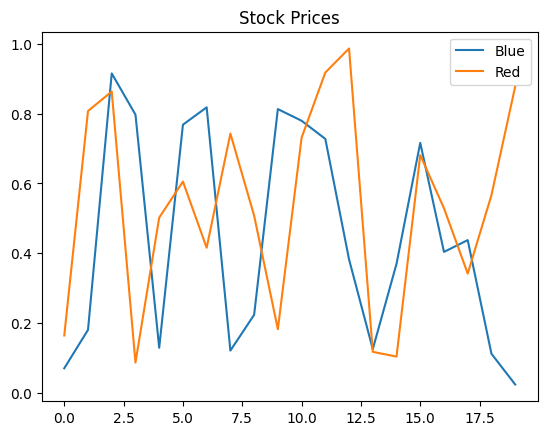

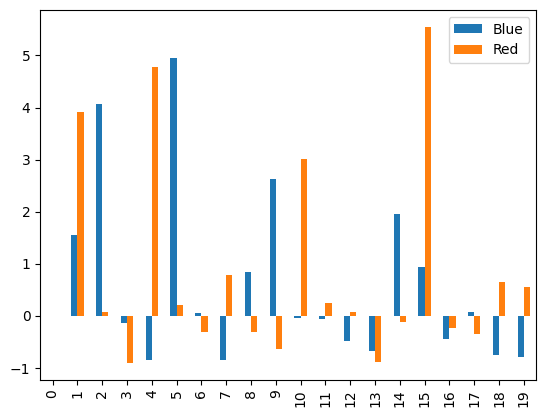

In [60]:
import numpy as np
import pandas as pd

# Generate a DataFrame with 2 columns and 20 rows of random numbers
random_data = pd.DataFrame(np.random.rand(20, 2), columns=['Blue', 'Red'])
#print(random_data)
returns = random_data.pct_change()
random_data.plot(title="Stock Prices")
returns.plot.bar()
#print(returns.std())
#print(returns.mean())

print(returns + 1)
#Kompounding is just this returns plus 1 format , need to subtract 1 , .prod  - 1 



## How to compere returns across periods of time 
### Annualizing returs
The return you would get if the return you are looking at would continue. 
$$
((1+0.01)^{12}-1)
$$

In [ ]:
#Askje stiger 1% over 3mnd (ett kvartal) , Hva er annualisert vekst/profitt. 
#12/3 = 4
((1+0.01)**(4)-1)

#Monthly 
rm = 0.01
((1+rm)**12-1)*100

#Quarterly
rq = 0.04
((1+rq)**4-1)*100

#Daily
rd = 0.001
((1+rd)**252-1)*100

28.643404437615217

### Volatility:
This is the standard deviation of the portfolio's return and serves as the most basic measure of risk. It is calculated as 

$$
√(wᵀΣw) 
$$ 
where Σ is the covariance matrix of the assets' returns.

The square of the volatility, known as variance, is also commonly used as a risk proxy.

* Population Variance 
$$
\sigma^2 = \frac{\sum_{i=1}^{N}(X_i - \mu)^2}{N}
$$

* Sample variance 
$$
s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}
$$


* Population standard deviation
$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N}(X_i - \mu)^2}{N}}
$$

* Sample standard deviation 
$$
s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}
$$

We compute the average of the square of the deviations from the mean. Måle varians. Deviation from the mean , squared to get positiv. 


### Annulzaing volatility: 
We cant compare the volatility from daily data with the volataolity ofrom the monthly data. 
Multiple the daily data by the days of the year (252)
$$
\sigma_{ann} = \sigma_p \sqrt{p}
$$

 Prosjektering , svingenger blir større se på som lys nærme og lenger vekk , spredning. 



In [89]:
random_data_2 = pd.DataFrame(np.random.rand(20, 2), columns=['Blue', 'Red'])
returns = random_data_2.pct_change()
print(returns)
returns = returns.dropna()
print(returns)

        Blue       Red
0        NaN       NaN
1   0.818378 -0.475567
2  -0.383615  0.608111
3  -0.560987 -0.615898
4   4.646361  1.589135
5  -0.681625  0.538750
6   0.776801  0.224891
7   0.349692 -0.019978
8  -0.840557 -0.621885
9  -0.172878  0.393277
10  0.276515 -0.163510
11  7.074178 -0.767280
12 -0.904209  2.333933
13  3.629400  1.728089
14  0.876303 -0.077572
15 -0.682296  0.231542
16  2.307436 -0.536043
17 -0.539233  0.136874
18  0.813052  0.549292
19 -0.261949  0.089242
        Blue       Red
1   0.818378 -0.475567
2  -0.383615  0.608111
3  -0.560987 -0.615898
4   4.646361  1.589135
5  -0.681625  0.538750
6   0.776801  0.224891
7   0.349692 -0.019978
8  -0.840557 -0.621885
9  -0.172878  0.393277
10  0.276515 -0.163510
11  7.074178 -0.767280
12 -0.904209  2.333933
13  3.629400  1.728089
14  0.876303 -0.077572
15 -0.682296  0.231542
16  2.307436 -0.536043
17 -0.539233  0.136874
18  0.813052  0.549292
19 -0.261949  0.089242


In [96]:
returns.std() # Sample 
derivations = returns - returns.mean()
print(derivations)
derivations_squared = derivations**2
print(derivations_squared)
variance = derivations_squared.mean()
print(variance) 
volatility = np.sqrt(variance) #Population 
print(volatility)

        Blue       Red
1  -0.052188 -0.746378
2  -1.254182  0.337300
3  -1.431554 -0.886709
4   3.775795  1.318324
5  -1.552192  0.267940
6  -0.093765 -0.045919
7  -0.520875 -0.290788
8  -1.711124 -0.892696
9  -1.043445  0.122466
10 -0.594051 -0.434320
11  6.203611 -1.038091
12 -1.774776  2.063122
13  2.758834  1.457278
14  0.005737 -0.348383
15 -1.552863 -0.039269
16  1.436870 -0.806853
17 -1.409800 -0.133936
18 -0.057515  0.278482
19 -1.132515 -0.181569
         Blue       Red
1    0.002724  0.557080
2    1.572972  0.113771
3    2.049347  0.786252
4   14.256625  1.737979
5    2.409300  0.071792
6    0.008792  0.002109
7    0.271311  0.084558
8    2.927945  0.796906
9    1.088777  0.014998
10   0.352897  0.188634
11  38.484791  1.077633
12   3.149830  4.256473
13   7.611162  2.123659
14   0.000033  0.121371
15   2.411383  0.001542
16   2.064594  0.651013
17   1.987536  0.017939
18   0.003308  0.077552
19   1.282591  0.032967
Blue    4.312417
Red     0.669170
dtype: float64
Blue    2.0

In [103]:
num_of_observations = returns.shape[0]
print(num_of_observations)
volatility = variance**0.5
print(volatility)


19
Blue    2.076636
Red     0.818028
dtype: float64


### Sharpe Ratio (SR):
Proposed by William Sharpe, this is a widely used risk-adjusted performance measure. It calculates the excess return of a portfolio over a risk-free rate, per unit of risk (volatility): 
$$
SR = (wᵀμ - r_f) / √(wᵀΣw).
$$

Annulaized small cap higher volatillity 
Annulized large cap lower volataolit 
 Return / Risk -> Dårlig måte å gjøre det på , look at excess return  over the risk free rate. 

$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$
* R_p: This is the expected return of the portfolio or investment.

* R_f: This is the risk-free rate of return. This is the theoretical return of an investment with zero risk, often represented by the yield on a government treasury bill.

* sigma_p (sigma p): This is the standard deviation of the portfolio's return, which is the measure of its volatility or risk.

Once you adjust for risk free rate , you get a better udnerstanding. 

### Beyond Normality: Higher-Order Moments and Downside Risk

Financial data often exhibits characteristics like asymmetry (skewness) and heavy tails (kurtosis), which means asset returns are not normally distributed. In such cases, relying solely on mean and variance can be insufficient for proper risk assessment.
Higher-Order Moments
To address non-normal returns, it is reasonable to incorporate higher-order moments into portfolio analysis:
### Skewness: 
This is the third central moment and measures the asymmetry of the return distribution. Investors generally prefer higher (positive) skewness.
### Kurtosis: 
This is the fourth central moment and measures the thickness of the distribution's tails. Investors prefer lower kurtosis, as high kurtosis indicates a greater potential for extreme outcomes (outliers).

## Downside Risk Measures
Since investors are typically more concerned with losses than with unexpected gains, downside risk measures offer a more relevant assessment of risk than variance, which penalises positive and negative deviations from the mean equally.
Key downside and tail risk measures include:
### Semi-Variance: 
First considered by Markowitz, this measure only accounts for returns that fall below the mean, thus capturing only the "undesired" risk.
### Value-at-Risk (VaR):
 A popular tail risk measure, VaR quantifies the maximum potential loss over a specific period with a given confidence level (e.g., 95%). It essentially identifies the quantile of the loss distribution. However, VaR does not provide information about the potential magnitude of losses beyond this threshold and is not a coherent risk measure because it lacks subadditivity.
### Conditional Value-at-Risk (CVaR):
 Also known as Expected Shortfall (ES), CVaR improves upon VaR by calculating the expected value of losses that exceed the VaR threshold. It considers the shape of the tail and is a coherent risk measure, satisfying properties like subadditivity which are crucial for diversification.

These alternative measures can be incorporated into portfolio optimization formulations, providing sophisticated alternatives to the original mean-variance approach.
